# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Loading Packages </p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predict-restaurant-customer-satisfaction-dataset/restaurant_customer_satisfaction.csv


In [3]:
df = pd.read_csv('/kaggle/input/predict-restaurant-customer-satisfaction-dataset/restaurant_customer_satisfaction.csv')
df = df.rename(columns={'CustomerID': 'OrderRecency'})

# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Overview</p>


In [4]:
df.head()

,OrderRecency,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0


In [5]:
df.shape

(1500, 19)

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Checking null values</p>


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OrderRecency          1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Basic Statistics </p>


In [8]:
print("\nSummary statistics for numerical features:")


Summary statistics for numerical features:


In [9]:
print(df.describe())

       OrderRecency          Age         Income  AverageSpend    GroupSize  \
count   1500.000000  1500.000000    1500.000000   1500.000000  1500.000000   
mean    1403.500000    43.832000   85921.890000    105.659004     5.035333   
std      433.157015    14.967157   38183.051749     52.381849     2.558864   
min      654.000000    18.000000   20012.000000     10.306127     1.000000   
25%     1028.750000    31.750000   52444.000000     62.287907     3.000000   
50%     1403.500000    44.000000   85811.000000    104.626408     5.000000   
75%     1778.250000    57.000000  119159.250000    148.649330     7.000000   
max     2153.000000    69.000000  149875.000000    199.973527     9.000000   

       OnlineReservation  DeliveryOrder  LoyaltyProgramMember     WaitTime  \
count        1500.000000    1500.000000           1500.000000  1500.000000   
mean            0.296667       0.405333              0.480000    30.163550   
std             0.456941       0.491120              0.499766  

In [10]:
print("\nSummary statistics for categorical features:")
df.describe(include=['object', 'category'])


Summary statistics for categorical features:


,Gender,VisitFrequency,PreferredCuisine,TimeOfVisit,DiningOccasion,MealType
count,1500,1500,1500,1500,1500,1500
unique,2,4,5,3,3,2
top,Female,Weekly,Italian,Breakfast,Celebration,Dine-in
freq,759,606,325,506,519,751


# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Visualization</p>


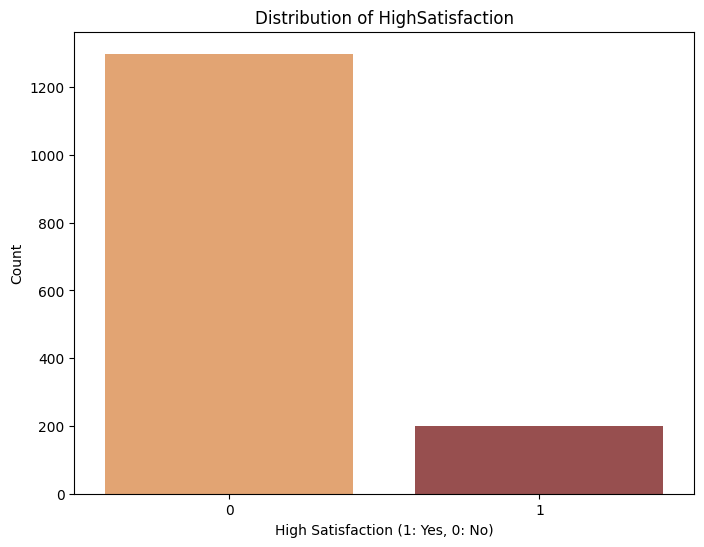

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HighSatisfaction', data=df, palette=['#F4A261','#A34343'])
plt.title('Distribution of HighSatisfaction')
plt.xlabel('High Satisfaction (1: Yes, 0: No)')
plt.ylabel('Count')
plt.show()


## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">For Numerical data</p>


> Numerical feature with HighSatisfaction = 1


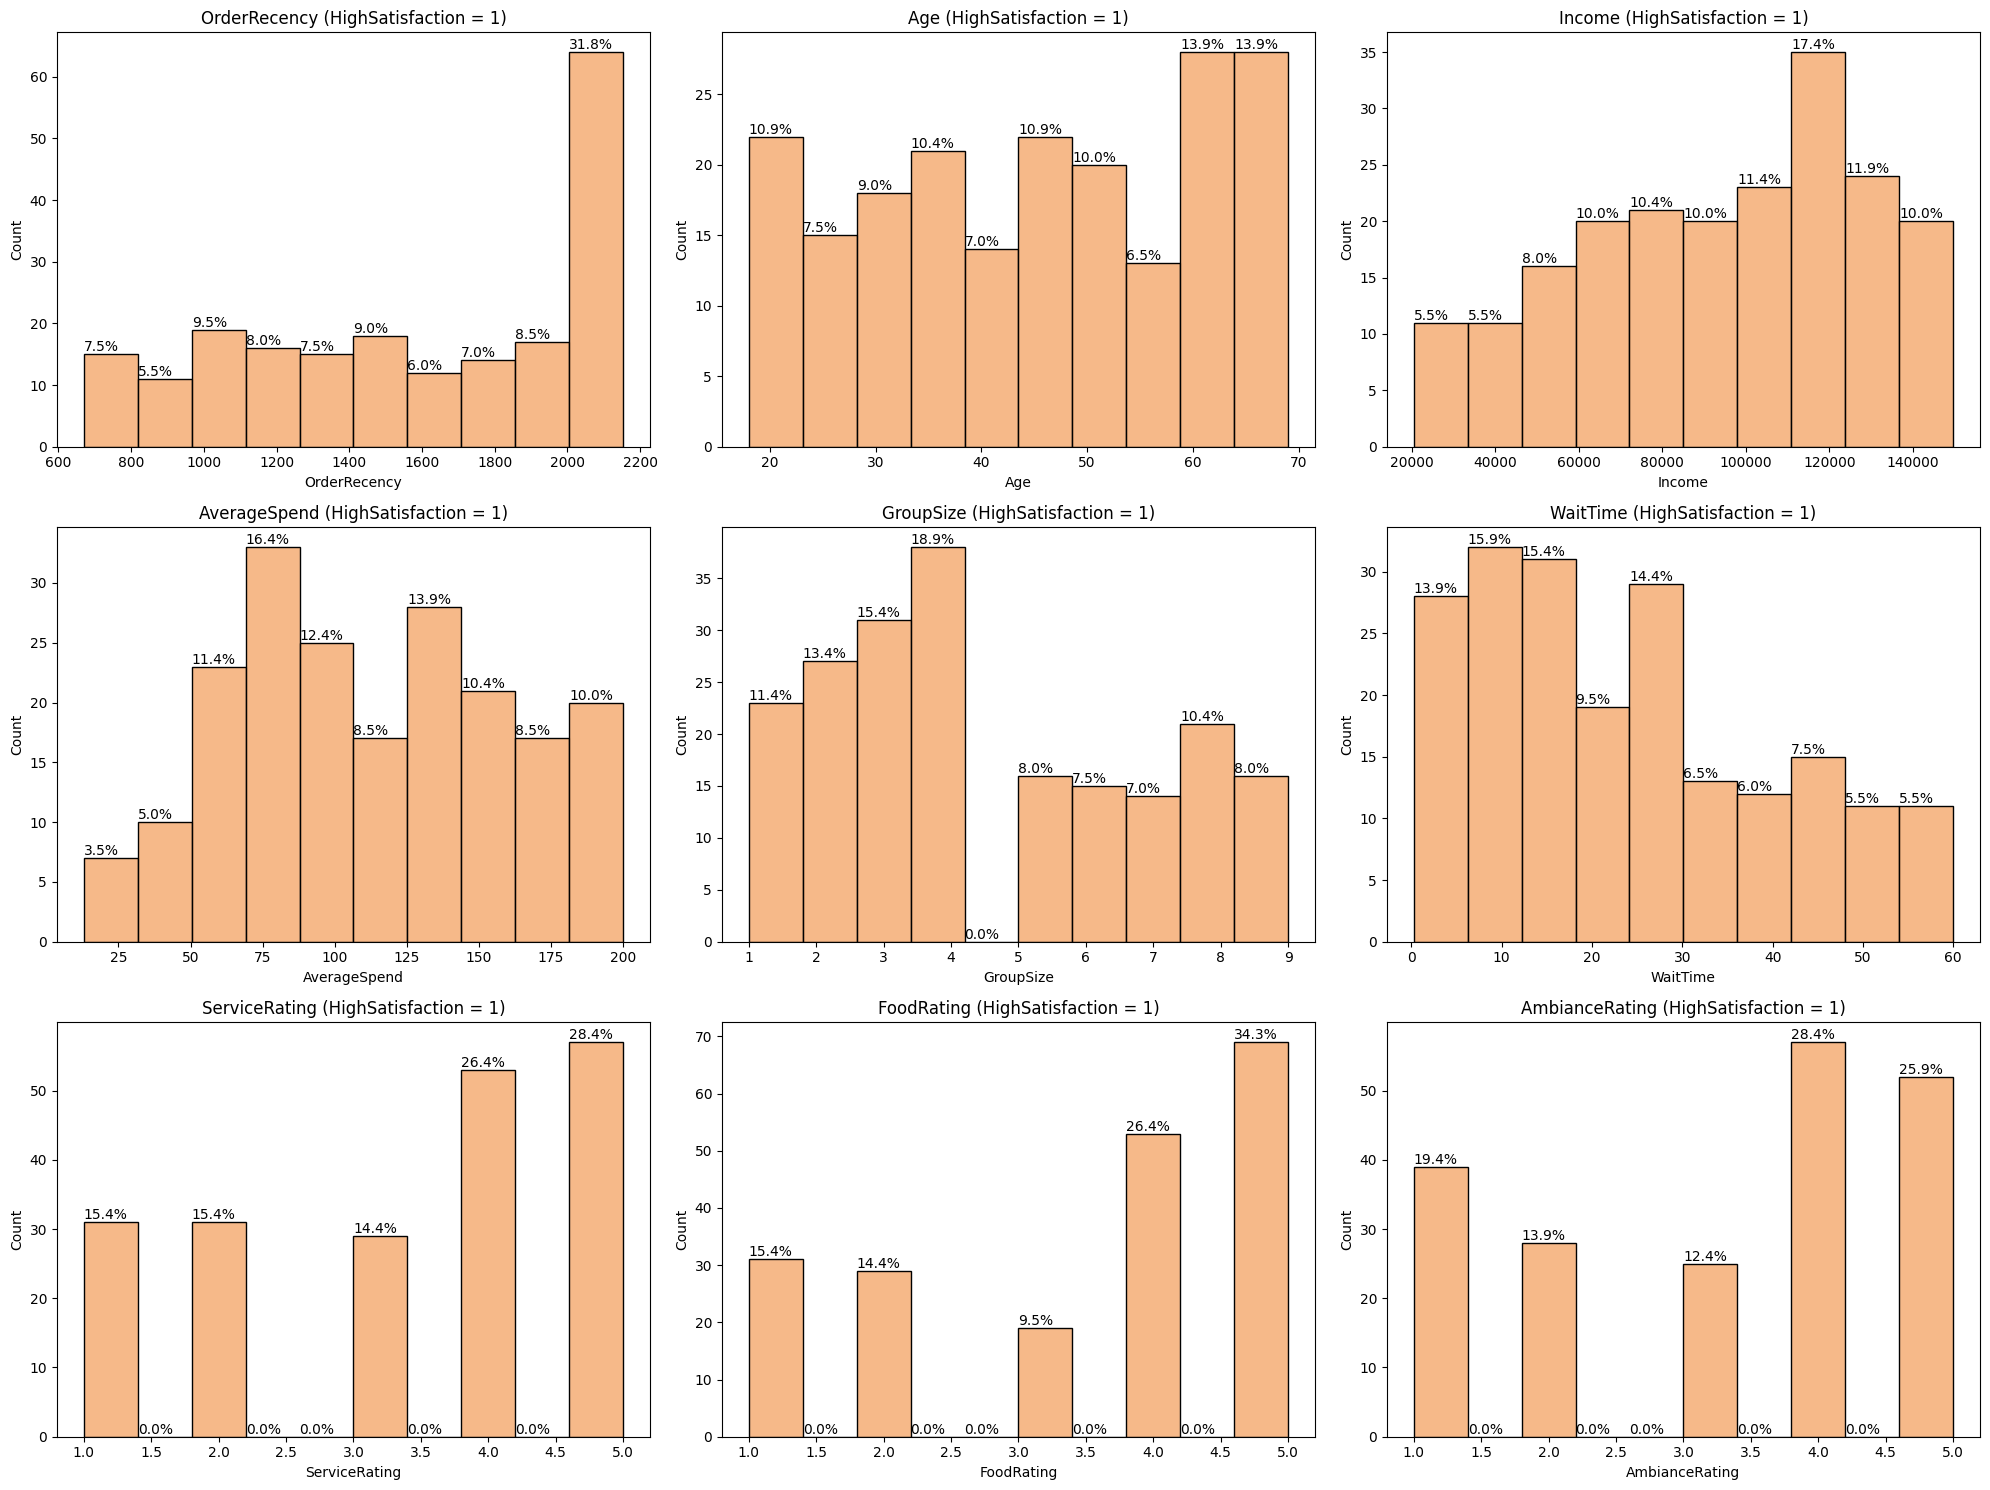

In [12]:
# Filter the data where HighSatisfaction is 1
df_highsat = df[df['HighSatisfaction'] == 1]

# Define numerical features
numerical_features = ['OrderRecency', 'Age', 'Income', 'AverageSpend', 'GroupSize', 'WaitTime', 'ServiceRating', 'FoodRating', 'AmbianceRating']

# Create histogram plots for each numerical feature with HighSatisfaction = 1
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_highsat[feature], kde=False, bins=10,color= '#F4A261')
    plt.title(f'{feature} (HighSatisfaction = 1)')

    counts, bins = np.histogram(df_highsat[feature], bins=10)
    total_counts = counts.sum()
    for count, bin_edge in zip(counts, bins):
        percentage = (count / total_counts) * 100
        plt.text(bin_edge, count, f'{percentage:.1f}%', ha='left', va='bottom')

plt.tight_layout()
plt.show()


## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">For Categorical data</p>


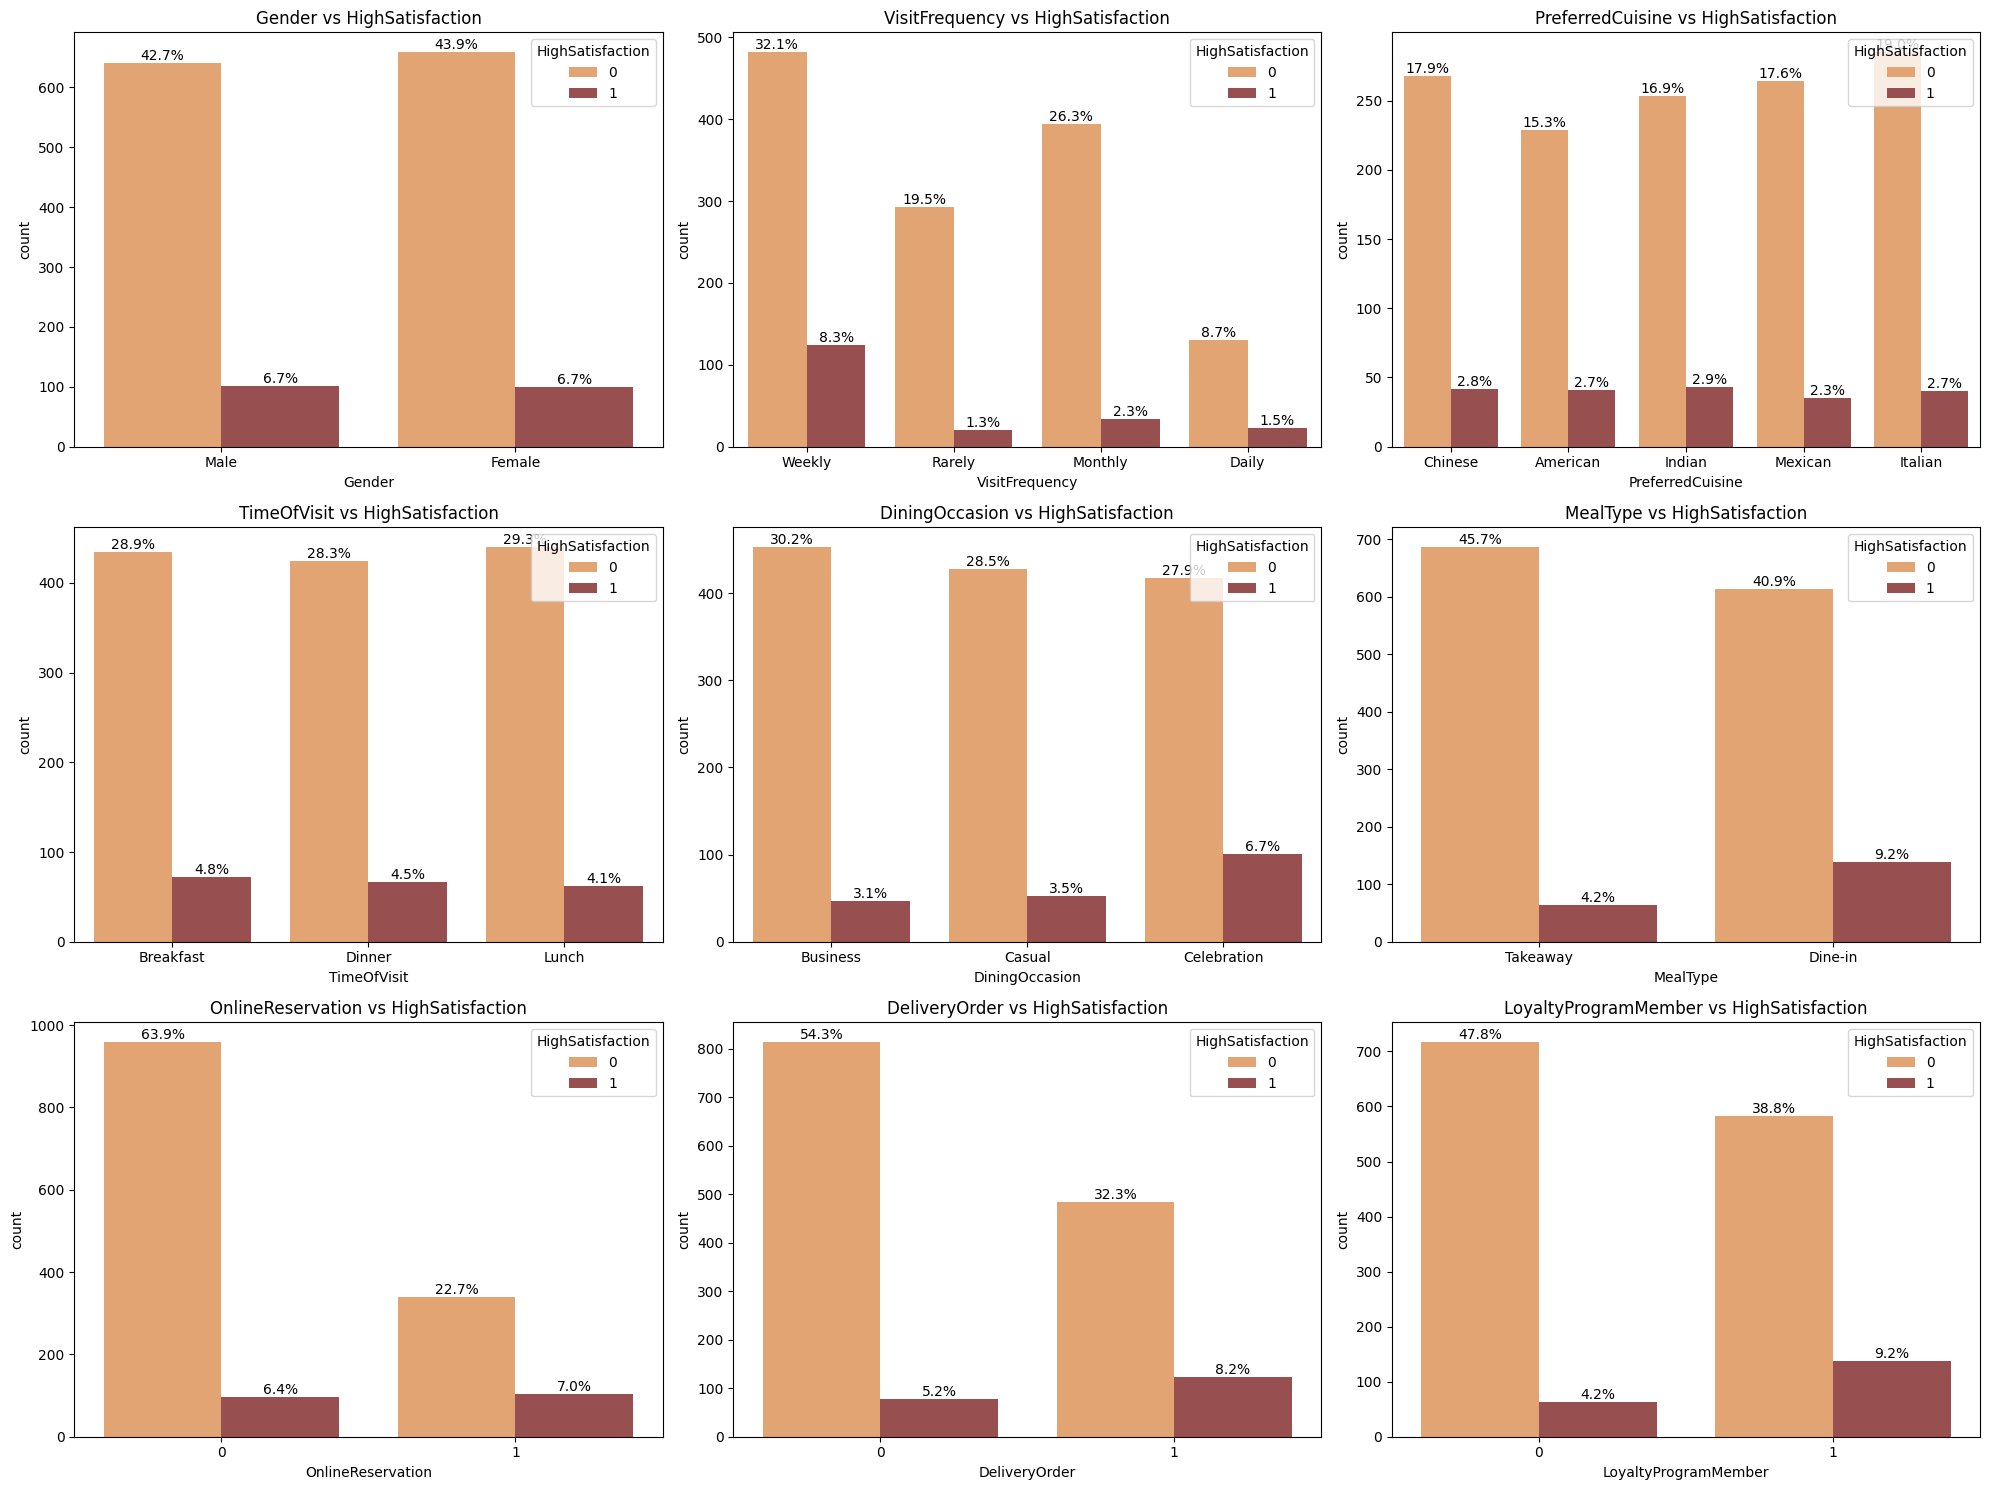

In [13]:
categorical_features = ['Gender', 'VisitFrequency', 'PreferredCuisine', 'TimeOfVisit', 'DiningOccasion', 'MealType', 'OnlineReservation', 'DeliveryOrder', 'LoyaltyProgramMember']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)
    ax = sns.countplot(data=df, x=feature, hue='HighSatisfaction',palette=['#F4A261','#A34343'])
    plt.title(f'{feature} vs HighSatisfaction')
    
    # Add percentage above each bar
    for p in ax.patches:
        total = sum([p.get_height() for p in ax.patches if p.get_x() == p.get_x()])
        percentage = (p.get_height() / total) * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

    plt.legend(title='HighSatisfaction')
plt.tight_layout()
plt.show()


## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Outliers detection</p>


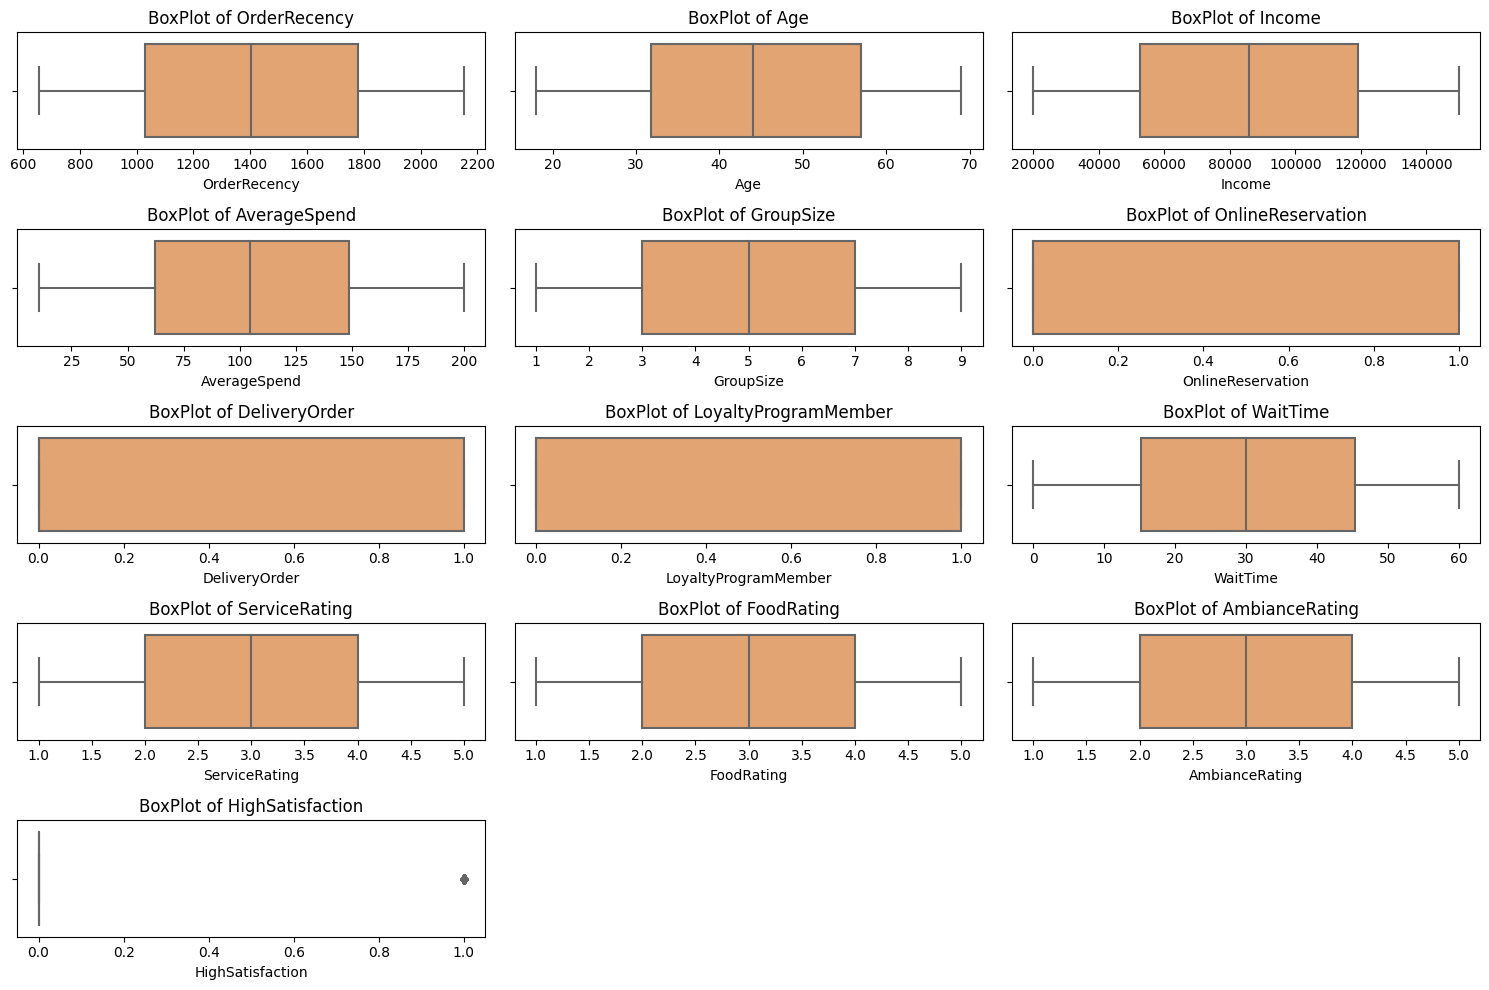

In [14]:
#only numerical features
numerical_columns = df.select_dtypes(include=['number']).columns

cols = 3  # Number of columns per row
rows = (len(numerical_columns) - 1) // cols + 1  # Number of rows, rounded up

# Visual inspection with box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df[column], color= '#F4A261')
    plt.title(f'BoxPlot of {column}')
    plt.tight_layout()
plt.show()

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Statistical methods: Z-score</p>


In [15]:
z_scores = zscore(df[numerical_columns])
abs_z_scores = np.abs(z_scores)
threshold = 3
outliers = (abs_z_scores > threshold).any(axis=1)

print("\nOutliers detected using Z-score:")
print(df[outliers])


Outliers detected using Z-score:
Empty DataFrame
Columns: [OrderRecency, Age, Gender, Income, VisitFrequency, AverageSpend, PreferredCuisine, TimeOfVisit, GroupSize, DiningOccasion, MealType, OnlineReservation, DeliveryOrder, LoyaltyProgramMember, WaitTime, ServiceRating, FoodRating, AmbianceRating, HighSatisfaction]
Index: []


# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Encoding features</p>


In [16]:
# Assuming df is your original DataFrame with the relevant columns: Age, Income, AverageSpend, WaitTime

# Categorize Age into 5 categories
age_bins = [18, 28, 38, 48, 58, 69]  # Adjusted to include 69 in the highest bin
age_labels = ['18-28', '28-38', '38-48', '48-58', '58-69']  # Adjusted labels
df['Age'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Categorize Income into 3 categories
income_bins = [20012, 63333, 106667, 149875]
income_labels = ['Low', 'Middle', 'High']
df['Income'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, include_lowest=True)

# Categorize AverageSpend into 10 categories
spend_bins = [10, 29, 48, 67, 86, 105, 124, 143, 162, 181, 200]
spend_labels = ['10-29', '29-48', '48-67', '67-86', '86-105', '105-124', '124-143', '143-162', '162-181', '181-200']
df['AverageSpend'] = pd.cut(df['AverageSpend'], bins=spend_bins, labels=spend_labels, include_lowest=True)

# Categorize WaitTime into 4 categories
wait_bins = [0, 15, 30, 45, 60]
wait_labels = ['0-15', '15-30', '30-45', '45-60']
df['WaitTime'] = pd.cut(df['WaitTime'], bins=wait_bins, labels=wait_labels, include_lowest=True)

# Print the first few rows of the modified dataframe
df.head()


,OrderRecency,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,28-38,Male,Middle,Weekly,10-29,Chinese,Breakfast,3,Business,Takeaway,0,1,1,30-45,2,5,4,0
1,655,18-28,Male,Low,Rarely,105-124,American,Dinner,1,Casual,Dine-in,0,0,0,45-60,5,5,3,0
2,656,38-48,Female,Middle,Weekly,105-124,American,Dinner,6,Celebration,Dine-in,0,1,0,45-60,3,4,5,0
3,657,38-48,Male,Middle,Rarely,29-48,Indian,Lunch,1,Celebration,Dine-in,0,0,0,0-15,4,5,1,0
4,658,48-58,Female,Middle,Monthly,143-162,Chinese,Breakfast,1,Business,Takeaway,0,0,1,30-45,2,3,5,0


In [17]:
# Identify qualitative (categorical) and quantitative (numerical) columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Frequency table for categorical features
print("Frequency Tables for Categorical Features:")
for column in categorical_columns:
    freq_table = df[column].value_counts().reset_index()
    freq_table.columns = [column, 'Count']
    freq_table['Percentage'] = 100 * freq_table['Count'] / len(df)
    print(f"\n{column}:\n{freq_table}")

# Frequency tables for numerical variables with count and percentage
print("\nFrequency tables for numerical variables with count and percentage:")
for column in numerical_columns:
    freq_table = df[column].value_counts().reset_index()
    freq_table.columns = [column, 'Count']
    freq_table['Percentage'] = 100 * freq_table['Count'] / len(df)
    print(f"\n{column}:\n{freq_table}")

Frequency Tables for Categorical Features:

Age:
     Age  Count  Percentage
0  58-69    328   21.866667
1  18-28    304   20.266667
2  38-48    294   19.600000
3  48-58    290   19.333333
4  28-38    284   18.933333

Gender:
   Gender  Count  Percentage
0  Female    759        50.6
1    Male    741        49.4

Income:
   Income  Count  Percentage
0    High    532   35.466667
1     Low    491   32.733333
2  Middle    477   31.800000

VisitFrequency:
  VisitFrequency  Count  Percentage
0         Weekly    606   40.400000
1        Monthly    428   28.533333
2         Rarely    313   20.866667
3          Daily    153   10.200000

AverageSpend:
  AverageSpend  Count  Percentage
0       86-105    181   12.066667
1      105-124    168   11.200000
2      143-162    159   10.600000
3        67-86    157   10.466667
4        48-67    154   10.266667
5      124-143    148    9.866667
6        29-48    139    9.266667
7      162-181    139    9.266667
8      181-200    134    8.933333
9        1

In [18]:
df.head(5)

,OrderRecency,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,28-38,Male,Middle,Weekly,10-29,Chinese,Breakfast,3,Business,Takeaway,0,1,1,30-45,2,5,4,0
1,655,18-28,Male,Low,Rarely,105-124,American,Dinner,1,Casual,Dine-in,0,0,0,45-60,5,5,3,0
2,656,38-48,Female,Middle,Weekly,105-124,American,Dinner,6,Celebration,Dine-in,0,1,0,45-60,3,4,5,0
3,657,38-48,Male,Middle,Rarely,29-48,Indian,Lunch,1,Celebration,Dine-in,0,0,0,0-15,4,5,1,0
4,658,48-58,Female,Middle,Monthly,143-162,Chinese,Breakfast,1,Business,Takeaway,0,0,1,30-45,2,3,5,0


In [19]:
df.columns

Index(['OrderRecency', 'Age', 'Gender', 'Income', 'VisitFrequency',
       'AverageSpend', 'PreferredCuisine', 'TimeOfVisit', 'GroupSize',
       'DiningOccasion', 'MealType', 'OnlineReservation', 'DeliveryOrder',
       'LoyaltyProgramMember', 'WaitTime', 'ServiceRating', 'FoodRating',
       'AmbianceRating', 'HighSatisfaction'],
      dtype='object')

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Binary Encoding</p>


In [20]:
# Binary Encoding for Gender
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# One-Hot Encoding for categorical features
one_hot_columns = ['PreferredCuisine', 'TimeOfVisit', 'DiningOccasion', 'MealType']
df = pd.get_dummies(df, columns=one_hot_columns)

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Ordinal Encoding</p>


In [21]:
# Define ordinal mappings
ordinal_mappings = {
    'Age': ['18-28', '28-38', '38-48', '48-58', '58-69'],
    'Income': ['Low', 'Middle', 'High'],
    'VisitFrequency': ['Daily', 'Weekly', 'Monthly', 'Rarely'],
    'AverageSpend': ['10-29', '29-48', '48-67', '67-86', '86-105', '105-124', '124-143', '143-162', '162-181', '181-200'],
    'WaitTime': ['0-15', '15-30', '30-45', '45-60'],

}

# Create an OrdinalEncoder and fit-transform the columns
ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_mappings])
df[list(ordinal_mappings.keys())] = ordinal_encoder.fit_transform(df[list(ordinal_mappings.keys())])

# Output the transformed DataFrame
df.head(5)


,OrderRecency,Age,Gender,Income,VisitFrequency,AverageSpend,GroupSize,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,...,PreferredCuisine_Italian,PreferredCuisine_Mexican,TimeOfVisit_Breakfast,TimeOfVisit_Dinner,TimeOfVisit_Lunch,DiningOccasion_Business,DiningOccasion_Casual,DiningOccasion_Celebration,MealType_Dine-in,MealType_Takeaway
0,654,1.0,1,1.0,1.0,0.0,3,0,1,1,...,False,False,True,False,False,True,False,False,False,True
1,655,0.0,1,0.0,3.0,5.0,1,0,0,0,...,False,False,False,True,False,False,True,False,True,False
2,656,2.0,0,1.0,1.0,5.0,6,0,1,0,...,False,False,False,True,False,False,False,True,True,False
3,657,2.0,1,1.0,3.0,1.0,1,0,0,0,...,False,False,False,False,True,False,False,True,True,False
4,658,3.0,0,1.0,2.0,7.0,1,0,0,1,...,False,False,True,False,False,True,False,False,False,True


## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Adding features</p>


In [22]:
df['TotalRating'] = df['ServiceRating'] + df['FoodRating'] + df['AmbianceRating']
df['OnlineReservation_DeliveryOrder'] = df['OnlineReservation'] * df['DeliveryOrder']

df['Gender_TimeOfVisit_PreferredCuisine'] = (
    df['Gender'].astype(str) + '_' +
    df['TimeOfVisit_Breakfast'].astype(str) + '_' +
    df['TimeOfVisit_Lunch'].astype(str) + '_' +
    df['TimeOfVisit_Dinner'].astype(str) + '_' +
    df['PreferredCuisine_Chinese'].astype(str) + '_' +
    df['PreferredCuisine_Italian'].astype(str) + '_' +
    df['PreferredCuisine_Indian'].astype(str) + '_' +
    df['PreferredCuisine_American'].astype(str) + '_' +
    df['PreferredCuisine_Mexican'].astype(str)
)

# Drop the individual encoded columns
df = df.drop(columns=['Gender',
    'TimeOfVisit_Breakfast', 'TimeOfVisit_Lunch', 'TimeOfVisit_Dinner',
    'PreferredCuisine_Chinese', 'PreferredCuisine_Italian','PreferredCuisine_Indian', 'PreferredCuisine_American', 'PreferredCuisine_Mexican',
    'OnlineReservation', 'DeliveryOrder','ServiceRating', 'FoodRating', 'AmbianceRating'
])


print(df['Gender_TimeOfVisit_PreferredCuisine'])
print(df['TotalRating'])
print(df['OnlineReservation_DeliveryOrder'])

0       1_True_False_False_True_False_False_False_False
1       1_False_False_True_False_False_False_True_False
2       0_False_False_True_False_False_False_True_False
3       1_False_True_False_False_False_True_False_False
4       0_True_False_False_True_False_False_False_False
                             ...                       
1495    1_False_True_False_False_False_False_True_False
1496    0_False_True_False_False_True_False_False_False
1497    1_False_True_False_False_False_False_True_False
1498    1_False_False_True_False_True_False_False_False
1499    1_True_False_False_True_False_False_False_False
Name: Gender_TimeOfVisit_PreferredCuisine, Length: 1500, dtype: object
0       11
1       13
2       12
3       10
4       10
        ..
1495     4
1496     9
1497     9
1498     8
1499    13
Name: TotalRating, Length: 1500, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
1495    0
1496    0
1497    0
1498    1
1499    1
Name: OnlineReservation_DeliveryOrde

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Frequesncy Encoding</p>


In [23]:
frequency = df['Gender_TimeOfVisit_PreferredCuisine'].value_counts()
df['Gender_TimeOfVisit_PreferredCuisine'] = df['Gender_TimeOfVisit_PreferredCuisine'].map(frequency)

df.head()

,OrderRecency,Age,Income,VisitFrequency,AverageSpend,GroupSize,LoyaltyProgramMember,WaitTime,HighSatisfaction,DiningOccasion_Business,DiningOccasion_Casual,DiningOccasion_Celebration,MealType_Dine-in,MealType_Takeaway,TotalRating,OnlineReservation_DeliveryOrder,Gender_TimeOfVisit_PreferredCuisine
0,654,1.0,1.0,1.0,0.0,3,1,2.0,0,True,False,False,False,True,11,0,48
1,655,0.0,0.0,3.0,5.0,1,0,3.0,0,False,True,False,True,False,13,0,35
2,656,2.0,1.0,1.0,5.0,6,0,3.0,0,False,False,True,True,False,12,0,56
3,657,2.0,1.0,3.0,1.0,1,0,0.0,0,False,False,True,True,False,10,0,49
4,658,3.0,1.0,2.0,7.0,1,1,2.0,0,True,False,False,False,True,10,0,56


# <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Model Evaluation </p>


## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Train test split</p>


In [24]:
from sklearn.model_selection import train_test_split

# Step 2: Define the features and target
# Assuming the target variable is 'HighSatisfaction' and the rest are features
X = df.drop('HighSatisfaction', axis=1)
y = df['HighSatisfaction']

# Step 3: Split the dataset into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting datasets to confirm the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1050, 16)
X_test shape: (450, 16)
y_train shape: (1050,)
y_test shape: (450,)


## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Features normalization</p>


In [25]:
# Define the features to be normalized
numerical_features = ['OrderRecency', 'Age', 'Income', 'VisitFrequency', 'AverageSpend', 'GroupSize', 'WaitTime', 'TotalRating']


# Apply Min-Max Scaling to numerical features
scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Display the first few rows of the normalized training data
print(X_train.head())

     OrderRecency  Age  Income  VisitFrequency  AverageSpend  GroupSize  \
485          1139  3.0     2.0             2.0           1.0          9   
527          1181  1.0     2.0             1.0           9.0          7   
199           853  4.0     1.0             2.0           6.0          8   
889          1543  0.0     2.0             2.0           1.0          1   
844          1498  0.0     1.0             2.0           5.0          6   

     LoyaltyProgramMember  WaitTime  DiningOccasion_Business  \
485                     0       0.0                    False   
527                     0       1.0                    False   
199                     0       2.0                     True   
889                     0       0.0                    False   
844                     0       0.0                    False   

     DiningOccasion_Casual  DiningOccasion_Celebration  MealType_Dine-in  \
485                   True                       False              True   
527         

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Metrics Evaluation</p>


In [26]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred_log_reg = log_reg.predict(X_train)
y_test_pred_log_reg = log_reg.predict(X_test)

# Define a function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, dataset_type):
    print(f"Evaluation metrics for {dataset_type} dataset:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.4f}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
    print("\n")

# Print evaluation metrics for Logistic Regression training data
print_evaluation_metrics(y_train, y_train_pred_log_reg, "training")

# Print evaluation metrics for Logistic Regression testing data
print_evaluation_metrics(y_test, y_test_pred_log_reg, "testing")

print("Logistic Regression vs Decision Tree Performance:")
print(f"Logistic Regression Training Accuracy: {accuracy_score(y_train, y_train_pred_log_reg):.4f}")
print(f"Logistic Regression Testing Accuracy: {accuracy_score(y_test, y_test_pred_log_reg):.4f}")

Evaluation metrics for training dataset:
Accuracy: 0.8990
Precision: 0.7333
Recall: 0.3901
F1 Score: 0.5093
Confusion Matrix:
[[889  20]
 [ 86  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       909
           1       0.73      0.39      0.51       141

    accuracy                           0.90      1050
   macro avg       0.82      0.68      0.73      1050
weighted avg       0.89      0.90      0.89      1050



Evaluation metrics for testing dataset:
Accuracy: 0.8844
Precision: 0.5909
Recall: 0.4333
F1 Score: 0.5000
Confusion Matrix:
[[372  18]
 [ 34  26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       390
           1       0.59      0.43      0.50        60

    accuracy                           0.88       450
   macro avg       0.75      0.69      0.72       450
weighted avg       0.87      0.88      0.88       450




## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Regression Equation and coefficients </p>


In [27]:
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]

# Print coefficients
print("Logistic Regression Coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

# Print the intercept
print(f"Intercept: {intercept:.4f}")

# Construct and print the logistic regression equation
equation = "Logit(p) = " + f"{intercept:.4f}"
for feature, coef in zip(X.columns, coefficients):
    equation += f" + ({coef:.4f} * {feature})"

print("\nLogistic Regression Equation:")
print(equation)


Logistic Regression Coefficients:
OrderRecency: 0.0014
Age: 0.0872
Income: 0.3718
VisitFrequency: -0.5534
AverageSpend: 0.1077
GroupSize: -0.2420
LoyaltyProgramMember: 0.9962
WaitTime: -0.6152
DiningOccasion_Business: -1.4957
DiningOccasion_Casual: -1.0654
DiningOccasion_Celebration: -0.0008
MealType_Dine-in: -0.6096
MealType_Takeaway: -1.9523
TotalRating: 0.3136
OnlineReservation_DeliveryOrder: 1.8927
Gender_TimeOfVisit_PreferredCuisine: -0.0190
Intercept: -3.1757

Logistic Regression Equation:
Logit(p) = -3.1757 + (0.0014 * OrderRecency) + (0.0872 * Age) + (0.3718 * Income) + (-0.5534 * VisitFrequency) + (0.1077 * AverageSpend) + (-0.2420 * GroupSize) + (0.9962 * LoyaltyProgramMember) + (-0.6152 * WaitTime) + (-1.4957 * DiningOccasion_Business) + (-1.0654 * DiningOccasion_Casual) + (-0.0008 * DiningOccasion_Celebration) + (-0.6096 * MealType_Dine-in) + (-1.9523 * MealType_Takeaway) + (0.3136 * TotalRating) + (1.8927 * OnlineReservation_DeliveryOrder) + (-0.0190 * Gender_TimeOfVisit_P

## <p style="background-color:#F4A261;font-family:newtimeroman;color:#B43F3F;font-size:150%;text-align:center;border-radius:20px 60px;">Confusion Matrix</p>


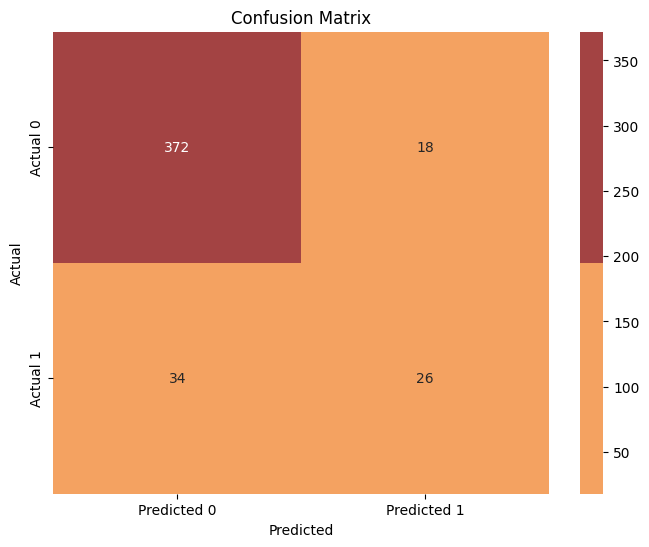

In [28]:
y_pred = log_reg.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=sns.color_palette(['#F4A261', '#A34343']),
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()